This is a very basic jupyter tutorial for the Hereditary Depth First Search (HDFS) from the pathfinder module.

The aim of this exercise is to identify the optimum subset of elements where elements could refer to a sets of features for ML training, Linear Regression or experimental observables. Given access to a pair wise relation matrix - e.g. Pearson Correlation, Fisher Information, Joint Mutual Information, ... - one can construct a Binary Acceptance Matrix (BAM) by defining a threshold (T) below which combination is allowed. The HDFS algorithm will efficiently identify all subsets of elements whose pairwise relations fall below T for all elements in the subset. Thus the HDFS algorithm provides a list of subsets containing minimally 'related' elements. 

In [11]:
# preamble
import numpy as np
import pathfinder as pf
from pathfinder import plot_results

Set random seed for the pseudo data generation

In [12]:
seed = 0
np.random.seed(seed) 
print(f"seed = {seed}")

seed = 0


Here we will create the "Binary Acceptance Matrix" (BAM). \
\
The BAM ($\rho$) is a symmetric Boolean matrix that provides the pair-wise combination condition i.e element $i$ can be combined with elemet $j$ if $\rho_{ij}$ = True  \
\
For this example we will create a 'psudo' BAM by randomly generating matrix elements with Boolean values distributed as follows:

$ P(\rho_{ij}=True) = p$ \
\
 $P(\rho_{ij}=False) = 1-p$

In [13]:
N = 25                                                                          # Matrix size
p = 0.5                                                                         # Distribution of True values 
pseudo = np.triu(np.random.choice([True, False], size=(N,N), p=[p, 1-p]), 1)    # Construct BAM values 
pseudo += pseudo.T                                                              # Construct symmetric matrix

The aim of this exsersise is to identify the optimum subset of elements.
The HDFS algorithm identifies **all** allowed subsets elements using the Binary Acceptance Matrix.
To help choose the optimum set one can provide a list of weights which will give preference to the highest total path weight sum. 
If run without weight the "**find_paths**" method will return the longest paths as if uniformly weighted to 1.



(<Figure size 1000x666.667 with 1 Axes>, <Axes: >)

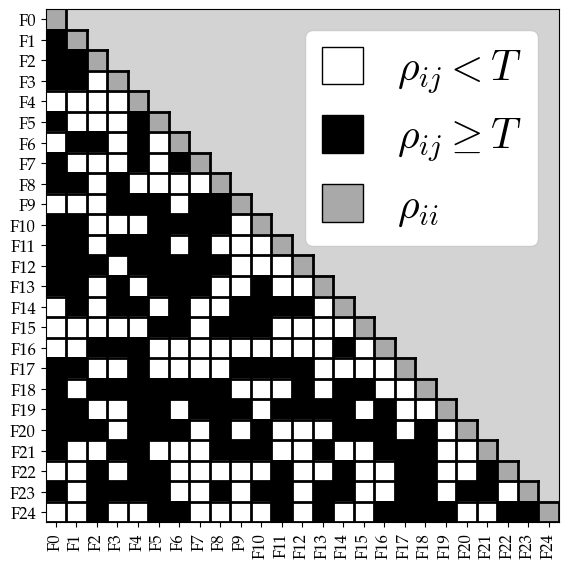

In [14]:
# Generate pseudo weights
weights = np.random.rand(N)
# Provide pseudo BAM and Weights to BinaryAcceptance class
bam = pf.BinaryAcceptance(pseudo, weights=weights, labels=[f'F{i}' for i in range(N)]   )
# Plot the BAM
plot_results.plot(bam, size=10)                                                          

Provide the **BinaryAcceptance** Object to **HDFS** and run **find_paths** to get the top 5 results

In [15]:
hdfs = pf.find_best_combinations(matrix=pseudo,
                                 weights=weights,
                                 top=5, 
                                 allow_subset=False, 
                                 verbose=True,
                                 labels=[f'F{i}' for i in range(N)],
                                 algorithm='hdfs')

1: Path = [1, 7, 15, 16, 22, 23],  Weight = 4.499650470394825,
2: Path = [1, 9, 16, 22, 23],  Weight = 3.9923021629214137,
3: Path = [2, 13, 14, 15, 17],  Weight = 3.864917897386761,
4: Path = [2, 7, 14, 15, 17],  Weight = 3.707504655554509,
5: Path = [2, 8, 13, 14, 17],  Weight = 3.538763790669759


Provide the **BinaryAcceptance** Object to **WHDFS** and run **find_paths** to get the top 5 results

In [16]:
whdfs = pf.find_best_combinations(matrix=pseudo,
                                  weights=weights,
                                  top=5, 
                                  allow_subset=False, 
                                  verbose=True,
                                  labels=[f'F{i}' for i in range(N)],
                                  algorithm='whdfs')

1: Path = [1, 7, 15, 16, 22, 23],  Weight = 4.499650470394825,
2: Path = [1, 9, 16, 22, 23],  Weight = 3.992302162921413,
3: Path = [2, 13, 14, 15, 17],  Weight = 3.8649178973867615,
4: Path = [2, 7, 14, 15, 17],  Weight = 3.707504655554509,
5: Path = [2, 8, 13, 14, 17],  Weight = 3.5387637906697584


In [17]:
# Show sorted results where path indices are sorted by weight
print(whdfs.get_sorted_results())

1: Path = [2, 4, 5, 7, 11, 14],  Weight = 4.499650470394825,
2: Path = [2, 4, 6, 7, 11],  Weight = 3.992302162921413,
3: Path = [0, 5, 8, 9, 12],  Weight = 3.8649178973867615,
4: Path = [0, 5, 8, 9, 14],  Weight = 3.707504655554509,
5: Path = [0, 8, 9, 12, 13],  Weight = 3.5387637906697584


1: Path = [2, 4, 5, 7, 11, 14],  Weight = 4.499650470394825,  

2: Path = [2, 4, 6, 7, 11],  Weight = 3.992302162921413,  

3: Path = [0, 5, 8, 9, 12],  Weight = 3.8649178973867615,  

4: Path = [0, 5, 8, 9, 14],  Weight = 3.707504655554509,  

5: Path = [0, 8, 9, 12, 13],  Weight = 3.5387637906697584  


In [18]:
print("WHDFS == HDFS")
print(f"Object comparison: {whdfs == hdfs}")
print(f"Weight comparison: {all([np.isclose(w.weight, h.weight) for w, h in zip(whdfs.res, hdfs.res)])} (fp tolerance 1e-9)")
print(f"Path comparison:   {hdfs.get_paths == hdfs.get_paths}")

WHDFS == HDFS
Object comparison: True
Weight comparison: True (fp tolerance 1e-9)
Path comparison:   True


Plot Results

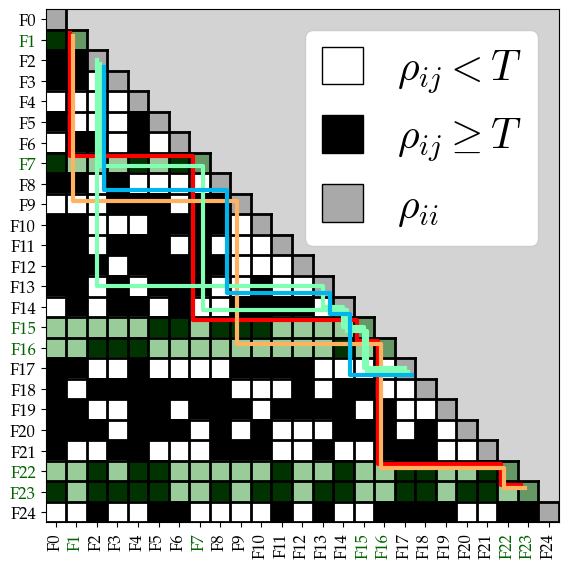

In [19]:
axis = plot_results.plot(bam, whdfs, size=10, plot_sorted=False, axis_labels=True, highlight_top_path=True)

## Comparing HDFS and WHDFS Results

With `auto_sort=True` (default), WHDFS automatically returns paths in **original index space** via `get_paths`, making comparison with HDFS straightforward.

**Important**: The internal storage (`res` attribute) differs between HDFS and WHDFS:
- `hdfs.res` contains paths in original index space
- `whdfs.res` contains paths in sorted index space (for performance)

Always use `get_paths` and `get_weights` properties, or the `==` operator for comparison.

In [20]:
print("Results match (using ==):", whdfs == hdfs)
print("Paths match:", whdfs.get_paths == hdfs.get_paths)
print("Weights match (within floating-point tolerance):", 
      all([np.isclose(w, h) for w, h in zip(whdfs.get_weights, hdfs.get_weights)]))
print()
print("Note: whdfs.res != hdfs.res because res contains internal storage")
print("  (sorted indices for WHDFS, original indices for HDFS)")
print("  Always use get_paths/get_weights or == comparison instead!")

Results match (using ==): True
Paths match: True
Weights match (within floating-point tolerance): True

Note: whdfs.res != hdfs.res because res contains internal storage
  (sorted indices for WHDFS, original indices for HDFS)
  Always use get_paths/get_weights or == comparison instead!


## Visualizing with plot_sorted Parameter

The new `plot_sorted` parameter controls whether paths are plotted in original or sorted (weight-ordered) index space:
- `plot_sorted=False` (default): Plot in original index space - HDFS and WHDFS look the same
- `plot_sorted=True`: Plot in sorted index space - shows weight-ordered structure